In [1]:
from compression import encode, decode

text = "Entropy is a scientific concept, most commonly associated with states of disorder, randomness, or uncertainty. The term and the concept are used in diverse fields, from classical thermodynamics-where it was first recognized, to the microscopic description of nature in statistical physics, and to the principles of information theory."
encoded_range = encode(text)
num = encoded_range[0] + (encoded_range[1] - encoded_range[0]) / 2

decoded = decode(num,len(text))

print(f"Original text: {text}")
print(f"Encoded text: {num}")
print(f"Decoded text: {decoded}")
print(f"Decoded text is equal to original text: {text == decoded}")


# analyse the compression rati


# 0428708030


2025-03-01 10:45:38.597316: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-01 10:45:38.616382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-01 10:45:38.640044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-01 10:45:38.645047: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-01 10:45:38.663761: I tensorflow/core/platform/cpu_feature_guar

Position 0: 'E' -> Range: (0.7265625000, 0.7304687500)
Position 1: 'n' -> Range: (0.7270118607, 0.7270408533)
Position 2: 't' -> Range: (0.7270171587, 0.7270177711)
Position 3: 'r' -> Range: (0.7270171800, 0.7270175167)
Position 4: 'o' -> Range: (0.7270172548, 0.7270172566)
Position 5: 'p' -> Range: (0.7270172556, 0.7270172557)
Position 6: 'y' -> Range: (0.7270172556, 0.7270172556)
Position 7: ' ' -> Range: (0.7270172556, 0.7270172556)
Position 8: 'i' -> Range: (0.7270172556, 0.7270172556)
Position 9: 's' -> Range: (0.7270172556, 0.7270172556)
Position 10: ' ' -> Range: (0.7270172556, 0.7270172556)
Position 11: 'a' -> Range: (0.7270172556, 0.7270172556)
Position 12: ' ' -> Range: (0.7270172556, 0.7270172556)
Position 13: 's' -> Range: (0.7270172556, 0.7270172556)
Position 14: 'c' -> Range: (0.7270172556, 0.7270172556)
Position 15: 'i' -> Range: (0.7270172556, 0.7270172556)
Position 16: 'e' -> Range: (0.7270172556, 0.7270172556)
Position 17: 'n' -> Range: (0.7270172556, 0.7270172556)
Po

In [2]:
from decimal import Decimal, getcontext, ROUND_CEILING

def calculate_compression_ratio(original_text, final_low, final_high):
    """
    Calculate compression ratio for arithmetic coding using Decimal.

    Args:
        original_text: The input text that was encoded.
        final_low: Lower bound of the final interval (as a Decimal).
        final_high: Upper bound of the final interval (as a Decimal).

    Returns:
        tuple: (compression_ratio, original_bits, compressed_bits)
    """
    # Original size in bits (assuming 8 bits per character)
    original_bits = len(original_text) * 8

    # Width of the final interval (as a Decimal)
    interval_width = final_high - final_low

    if interval_width <= 0:
        raise ValueError("Interval width must be positive.")

    # Compute negative log2(interval_width) using Decimal.ln():
    # log2(x) = ln(x) / ln(2)
    log2_interval = (- interval_width.ln()) / Decimal(2).ln()

    # Bits needed to represent a number in the interval; round up
    compressed_bits = int(log2_interval.to_integral_exact(rounding=ROUND_CEILING)) + 1

    # Compression ratio: original bits / compressed bits
    compression_ratio = Decimal(original_bits) / Decimal(compressed_bits)

    return compression_ratio, original_bits, compressed_bits

# Example usage:
# 'text' should be defined and 'encoded_range' should be a tuple (final_low, final_high) of Decimals.
comp, orig, compd = calculate_compression_ratio(text, encoded_range[0], encoded_range[1])

print(f"Compression ratio: {comp}")
print(f"Original bits: {orig}")
print(f"Compressed bits: {compd}")



Compression ratio: 1.2422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212924221292422129242212

Starting with: 'Entropy is a scientific concept, most commonly associated with states of disorder, randomness, or uncertainty. The term and the concept are used in diverse fields, from classical thermodynamics-where it was first recognized, to the microscopic description of nature in statistical physics, and to the principles of information theory.'
Analyzing generation of: 'Entropy is a scientific concept, most commonly associated with states of disorder, randomness, or uncertainty. The term and the concept are used in diverse fields, from classical thermodynamics-where it was first recognized, to the microscopic description of nature in statistical physics, and to the principles of information theory.'
--------------------------------------------------

Position 1: Generating 'E'
Entropy at this position: 8.0000 bits
Probability of 'E': 0.003906
Surprise value: 8.0000 bits
Top 5 predicted bytes:
  \x00: 0.003906
  \x01: 0.003906
  \x02: 0.003906
  \x03: 0.003906
  \x04: 0.003906

Pos

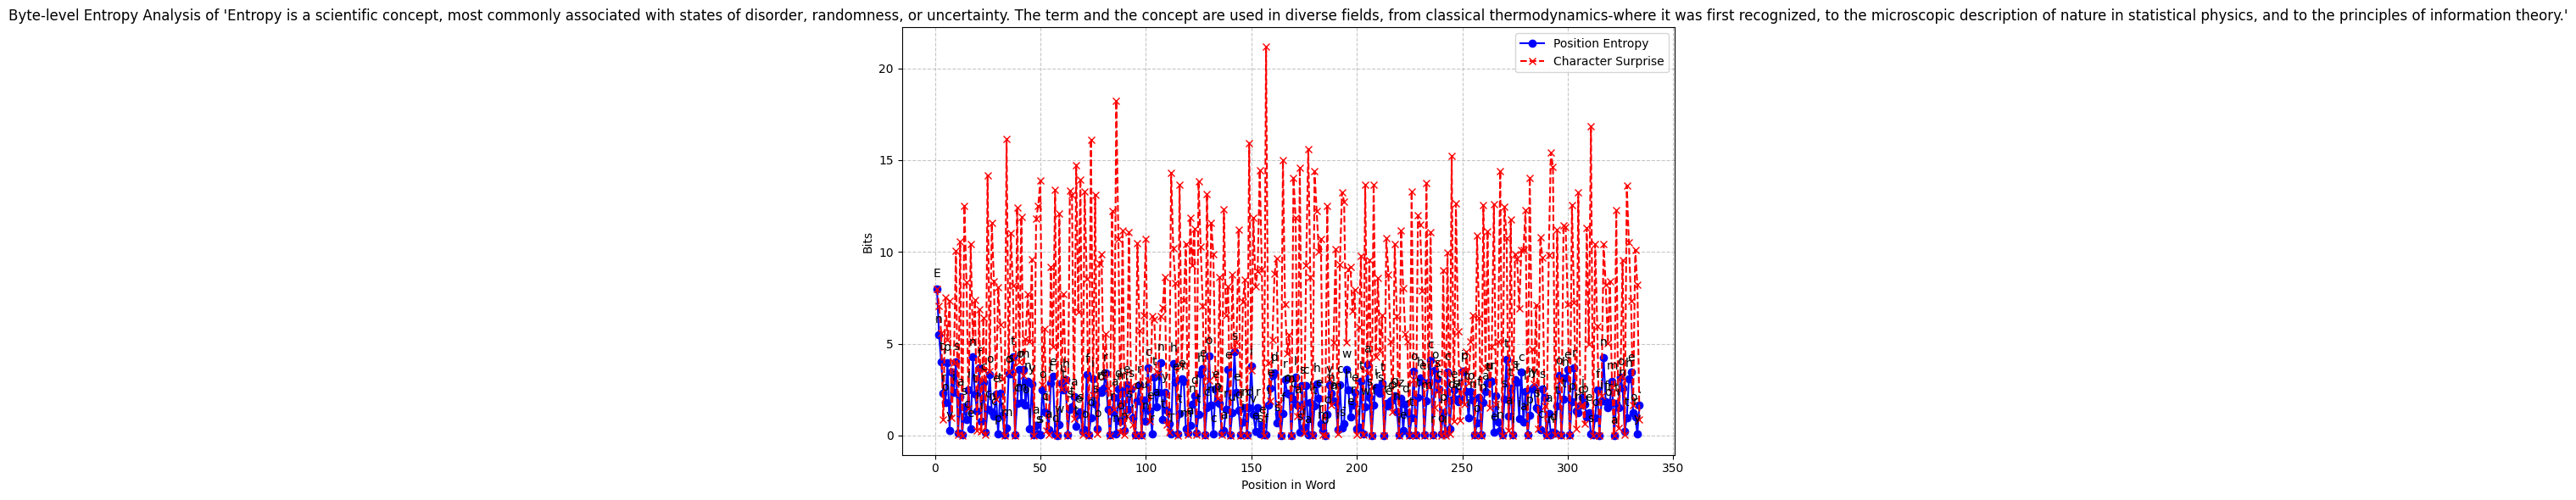

Text entropy: 2148.615336811166 bits
Perplexity: 86.40123627850016


In [3]:
from probs.analysis import autoregressive_byte_analysis
from probs.gpt2 import next_distribution

from math import log2

results = autoregressive_byte_analysis(next_distribution,text)

total_log_probs = sum([log2(x["probability"]) for x in results])
entropy = -total_log_probs

print(f"Text entropy: {entropy} bits")

total_surprise = sum([x["surprise"] for x in results])
mean_surprise = total_surprise / len(results)
perplexity = 2**(mean_surprise)

print(f"Perplexity: {perplexity}")



# Some results

## GPT-2

### `gpt2` (normal)
 - Entropy : 2220.0
 - Perplexity : 100.2
 - Compression Ratio: 1.2
### `gpt2-large` (large)
 - Entropy : 2148.6
 - Perprexity : 86.4
 - Compression Ratio : 1.24

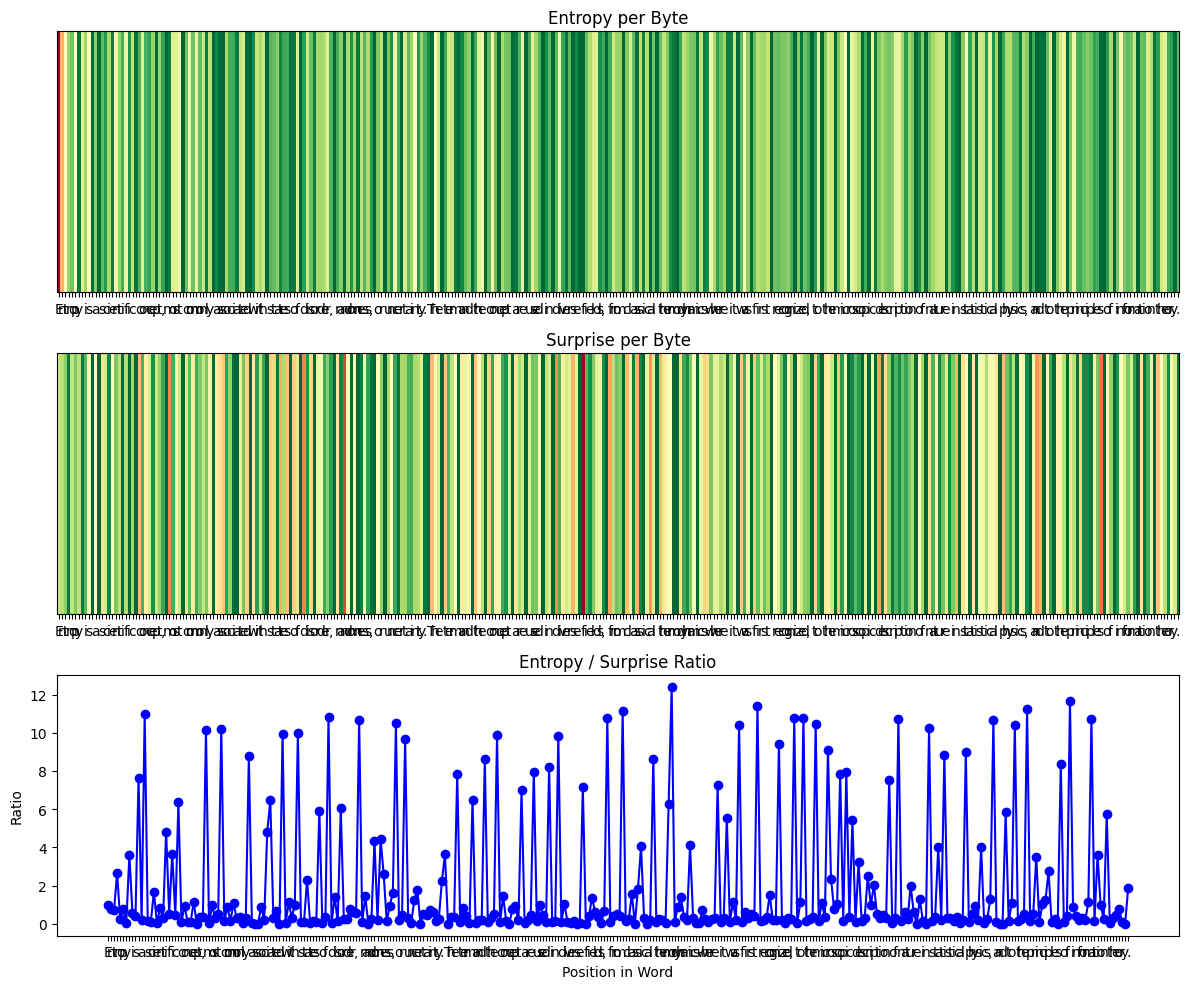

In [4]:
from probs.analysis import sentence_information_visualization

sentence_information_visualization(text,results)